# Conformer Generation in the Molecule Club

In [1]:
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import rdMolAlign
from rdkit.Chem.Draw import IPythonConsole

from molclub.conf_tools import etkdg, conf_utils
from molclub.compute import gfnff, gfnxtb
from molclub import visualize

## Conformer initialization using RDKit's ETKDG

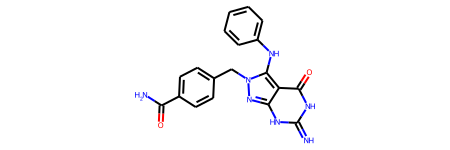

In [2]:
smi = 'NC(=O)C1=CC=C(CN2N=C3NC(=N)NC(=O)C3=C2NC2=CC=CC=C2)C=C1'
mol = Chem.MolFromSmiles(smi)
mol

there are 101 mols


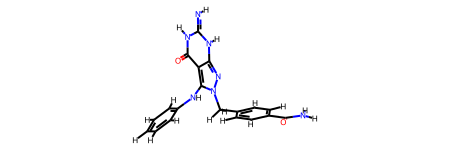

In [3]:
mols = etkdg.generate_conformers(mol, num_threads=4)
print(f'there are {len(mols)} mols')
display(mols[0])

In [8]:
visualize.mol(mols[0])

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Geometry optimization with xtb's GFNFF

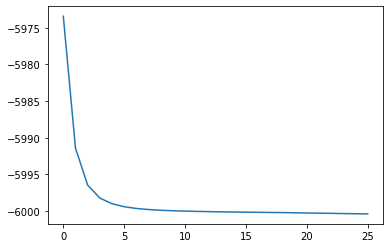

In [4]:
mol = mols[0]
steps, energies = gfnff.opt_traj(mol, 25, 4)

plt.plot(steps, energies)

In [5]:
mols_energies = [gfnff.opt(mol, num_threads=4) for mol in mols]
mols = [m_e[0] for m_e in mols_energies]
energies = [m_e[1] for m_e in mols_energies]

In [6]:
mols, energies = conf_utils.order_confs(mols, None, energies=energies)
energies[:5]

[-6069.945243732937,
 -6004.878998153525,
 -6004.782561627382,
 -6004.757845840612,
 -6004.73387619715]

In [7]:
print(len(mols))
mols, energies = conf_utils.prune(mols, energies)
print(len(mols))

106
44


# Now again with xtb instead of a force-field

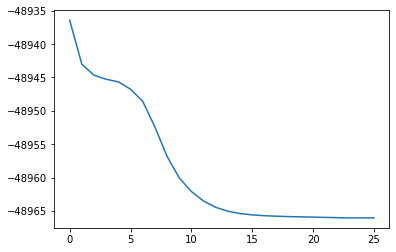

In [8]:
mol = mols[0]
steps, energies = gfnxtb.opt_traj(mol, max_iters=25, num_threads=4)

plt.plot(steps, energies)

In [11]:
mols_energies = [gfnxtb.opt(mol, num_threads=4) for mol in mols]

mols = [m_e[0] for m_e in mols_energies]
energies = [m_e[1] for m_e in mols_energies]

mols, energies = conf_utils.order_confs(mols, None, energies=energies)

In [12]:
print(len(mols))
mols, energies = conf_utils.prune(mols, energies)
print(len(mols))

44
38


In [16]:
boltzmann_pops = conf_utils.boltzmann_pop(energies)
print(len(mols))
mols = mols[:len(boltzmann_pops)]
energies = energies[:len(boltzmann_pops)]
print(len(mols))

9
9


In [21]:
rms_list = []
for mol in mols[1:]:
    rms_list.append(rdMolAlign.GetBestRMS(mol, mols[0]))
display(rms_list)

[2.597733593921974,
 2.6726946189816907,
 2.6161611550743182,
 0.8037941097793687,
 0.7149149077765139,
 0.5717272655071735,
 2.6703944439045664,
 2.6154442922334336]